In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

<font size =5>資料前處理

In [2]:
df = pd.read_csv('./input/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop('PassengerId', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)
df = df.drop('Cabin', axis = 1)
df = df.drop('Embarked', axis = 1)

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [6]:
age = df['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
df['Age'].fillna(avgage, inplace = True)

In [7]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [8]:
sex_map = {'male' : 0, 'female' :1}
df['Sex'] = df['Sex'].map(sex_map)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [9]:
df_train = df[:700]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [10]:
df_test = df[700:]
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
700,1,1,1,18.0,1,0,227.5250
701,1,1,0,35.0,0,0,26.2875
702,0,3,1,18.0,0,1,14.4542
703,0,3,0,25.0,0,0,7.7417
704,0,3,0,26.0,1,0,7.8542


In [11]:
y = df_train['Survived'].values
df_train = df_train.drop('Survived',axis=1)

y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

<font size =5>Decision Tree

In [ ]:
import graphviz 
dtree=tree.DecisionTreeClassifier(max_depth=4)
dtree=dtree.fit(df_train,y)
dot_data = tree.export_graphviz(dtree, 
                filled=True, 
                feature_names=list(df_train),
                class_names=['die','survive'],
                special_characters=True)
graph = graphviz.Source(dot_data)  

In [ ]:
graph

In [13]:
dtree.feature_importances_

array([0.16696944, 0.5455259 , 0.10664061, 0.05101847, 0.        ,
       0.12984558])

In [41]:
y_test = df_test['Survived'].values
X_test = df_test.drop('Survived', 1)

y_predict = dtree.predict(X_test)

print('y_predict:',y_predict)
print('y_test:',y_test)

y_predict: [1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 1 1 0 0]
y_test: [1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0]


In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8534031413612565

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier(bootstrap=True, n_estimators=1000, max_depth=4)
clf.fit(df_train, y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8324607329842932

<font size =5>RandomForest

In [21]:
from sklearn import model_selection, metrics

In [22]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.accuracy_score(y, preds)

In [23]:
n_estimators = [1, 3, 5, 19, 23, 34, 73, 100,198]  
cv_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

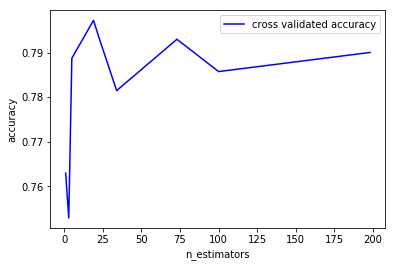

In [24]:
line1= plt.plot(n_estimators, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

In [25]:
best_n_estimators = n_estimators[cv_results.index(max(cv_results))]
print ("best_n_estimators: ", best_n_estimators)
print ("best accuracy: ", max(cv_results))

best_n_estimators:  19
best accuracy:  0.7972128422710173


In [26]:
cv_results = []
max_depths = np.linspace(1, 32, 32, endpoint=True)  
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=max_depth)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

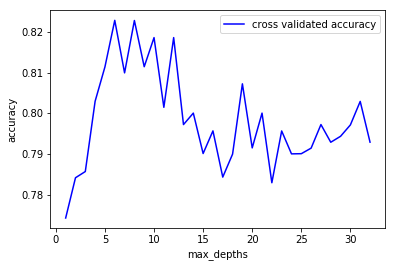

In [27]:
line1= plt.plot(max_depths, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depths')
plt.legend()
plt.show()

In [28]:
best_max_depths = max_depths[cv_results.index(max(cv_results))]
print ("best_max_depths:", best_max_depths)
print ("best accuracy: ", max(cv_results))

best_max_depths: 6.0
best accuracy:  0.8228472282973203


In [29]:
cv_results = []
min_samples_splits = [2,3,5,10,20,30,40,50,60,70,80]  ## try different min_samples_splits
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=min_samples_split)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

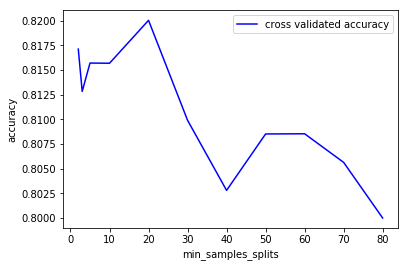

In [30]:
line1= plt.plot(min_samples_splits, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_splits')
plt.legend()
plt.show()

In [31]:
best_min_samples_splits = min_samples_splits[cv_results.index(max(cv_results))]
print ("best_min_samples_splits: ", best_min_samples_splits)
print ("best accuracy", max(cv_results))

best_min_samples_splits:  20
best accuracy 0.8200303268888695


In [32]:
cv_results = []
min_samples_leafs = range(1,7)  
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=best_min_samples_splits,
                              min_samples_leaf=min_samples_leaf)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

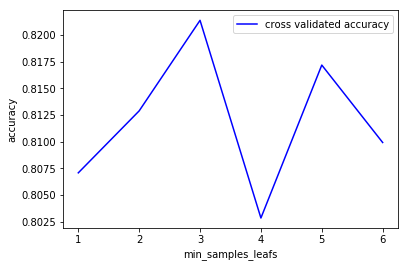

In [33]:
line1= plt.plot(min_samples_leafs, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leafs')
plt.legend()
plt.show()

In [34]:
best_min_samples_leafs =min_samples_leafs[cv_results.index(max(cv_results))]
print ("best_min_samples_leafs: ", best_min_samples_leafs)
print ("best accuracy", max(cv_results))

best_min_samples_leafs:  3
best accuracy 0.8213582946957105


In [35]:
n_features=len(df_test.columns)
cv_results = []
max_features = range(1,n_features+1)
for max_feature in max_features:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=best_min_samples_splits,
                              min_samples_leaf=best_min_samples_leafs)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

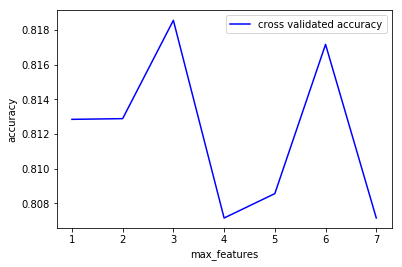

In [36]:
line1= plt.plot(max_features, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_features')
plt.legend()
plt.show()

In [37]:
best_max_features =max_features[cv_results.index(max(cv_results))]
print ("best_max_features: ", best_max_features)
print ("best accuracy", max(cv_results))

best_max_features:  3
best accuracy 0.8185615140116059


In [38]:
rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=best_min_samples_splits,
                           min_samples_leaf=best_min_samples_leafs,max_features=best_max_features)
rf.fit(df_train, y)
train_pred = rf.predict(df_train)
print ("Training acc:", accuracy_score(y, train_pred))
y_pred = rf.predict(X_test)

print ("Testing acc:", accuracy_score(y_test, y_pred))

Training acc: 0.8585714285714285
Testing acc: 0.8534031413612565


<font size=5>
Dataset簡介

<font color=black> 
    將當時鐵達尼號事件中存歿乘客的各項資訊，包含乘客名單、家屬人數、年齡及搭乘艙別等，來建立存活乘客與資訊的關聯性，即為事件中乘客存歿情形預測的dataset。可對新的一筆測試資料進行分析，以預測其存歿情形。

<font size=5>
結果觀察與分析

<font color=black>    
    由Decision tree跟Random forest兩者所輸出的accuracy比較可知，Random forest所輸出的accuracy通常會比較高，是由於Decision tree的feature是可以人為調控的，根據每個人所挑選的feature不同，而有產生不同的數據值，因此輸出的accuracy不一定會比較高；而Random forest採用隨機的方式在各限制條件下找尋accuracy的最高值，並把對應的限制條件之最佳解input到建模裡面，再輸出綜合最大的accuracy，簡而言之就是電腦幫你找到並輸出最佳解，因此Random forest所輸出的accuracy通常會比較高。

<font size=5>
對這堂課的建議與希望學到的東西

<font color=black>     
    這堂課內容十分豐富，但課程排課十分地緊湊；及課程重點雖然著重於問題導向的機械學習及資料科學應用，但由於Python程式接觸不深，本為輔助教材的Python程式逐漸地變成此課程的主軸，導致學習方向都以學會該資料分析應如何去輸入程式碼並執行其分析，而非理論的運算方式。
    雖然兩者皆有吸收，但最大的收穫莫過於上網搜尋如何輸入程式碼以及程式碼的運用，建議此課程錢可以先有'較基礎的Python程式課程'為基石，再修習此課程較佳；抑或僅開放對Python程式有相對熟悉度的同學修課為佳。
    接觸完此課程後，對Python有了一點概念，希望能學到更多Python有關程式碼輸入的一些技巧，以及常見的程式碼及其應用；除此之外，亦希望能更深入去了解舉凡KNN、gini、SVD等資料處理演算法，以更清楚其運作的模式。(課堂中雖有論述，但有點抽象，以實際模型去講解並分析其優劣可能比較好)